In [1]:
import scipy as sp
import scipy.io
from scipy import stats
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import glob
import csv
from tqdm import tnrange, tqdm_notebook
from collections import Iterable
import matplotlib.pylab as plt
import matplotlib.patches as patch
from matplotlib import gridspec
from datetime import datetime

In [2]:
projects_df = pd.read_csv('Projects.csv')
donations_df = pd.read_csv('Donations.csv')
schools_df = pd.read_csv('Schools.csv')

In [85]:
pd.read_csv('Donors.csv')

C:\Users\efink\Anaconda3\envs\kaggle\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075
5,00004c31ce07c22148ee37acd0f814b9,NaN,other,No,NaN
6,00004e32a448b4832e1b993500bf0731,Stamford,Connecticut,No,069
7,00004fa20a986e60a40262ba53d7edf1,Green Bay,Wisconsin,No,543
8,00005454366b6b914f9a8290f18f4aed,Argyle,New York,No,128
9,0000584b8cdaeaa6b3de82be509db839,Valparaiso,Indiana,No,463


In [3]:
display(projects_df.head(3))
display(donations_df.head(3))
schools_df.head(3)

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Current Status,Project Fully Funded Date
0,77b7d3f2ac4e32d538914e4a8cb8a525,c2d5cb0a29a62e72cdccee939f434181,59f7d2c62f7e76a99d31db6f62b7b67c,2,Teacher-Led,Anti-Bullying Begins with Me,do you remember your favorite classroom from e...,"Applied Learning, Literacy & Language","Character Education, Literacy",Grades PreK-2,Books,$490.38,2013-01-01,Fully Funded,2013-03-12
1,fd928b7f6386366a9cad2bea40df4b25,8acbb544c9215b25c71a0c655200baea,8fbd92394e20d647ddcdc6085ce1604b,1,Teacher-Led,Ukuleles For Middle Schoolers,what sound is happier than a ukulele? we have...,Music & The Arts,Music,Grades 6-8,Supplies,$420.61,2013-01-01,Expired,NaN
2,7c915e8e1d27f10a94abd689e99c336f,0ae85ea7c7acc41cffa9f81dc61d46df,9140ac16d2e6cee45bd50b0b2ce8cd04,2,Teacher-Led,"Big Books, Flip Books, And Everything In Between","my 1st graders may be small, but they have big...","Literacy & Language, Special Needs","Literacy, Special Needs",Grades PreK-2,Books,$510.46,2013-01-01,Fully Funded,2013-01-07


,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46


,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District
2,0002021bb799f28de224f1acc1ff08c4,Samantha Smith Elementary School,suburban,2.0,Washington,98074,Sammamish,King,Lake Washington Sch Dist 414


In [4]:
proj_df = projects_df.copy().dropna(subset = ['Project Fully Funded Date'])

#### Merge dataframes to collect 'School State' and 'Donation Amount' into one dataframe

In [5]:
proj_school_df = schools_df[['School ID', 'School State', 'School County']].merge(projects_df[['School ID','Project ID']], how = 'outer', on = ['School ID'])
don_proj_school_df = proj_school_df.merge(donations_df, how = 'outer', on = ['Project ID'])

In [6]:
# don_proj_school_df[don_proj_school_df['School State'] == 'Wyoming']

In [7]:
don_proj_school_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994571 entries, 0 to 4994570
Data columns (total 10 columns):
School ID                              object
School State                           object
School County                          object
Project ID                             object
Donation ID                            object
Donor ID                               object
Donation Included Optional Donation    object
Donation Amount                        float64
Donor Cart Sequence                    float64
Donation Received Date                 object
dtypes: float64(2), object(8)
memory usage: 419.2+ MB


In [8]:
county_grps = don_proj_school_df.groupby(['School State', 'School County'])
project_grps = don_proj_school_df.drop_duplicates('Project ID').groupby(['School State', 'School County'])

In [9]:
total_donations_by_county = county_grps['Donation Amount'].sum()
total_donations_by_county = total_donations_by_county.reset_index()
total_donations_by_county.rename(columns = {'School County': 'County'}, inplace = True)
total_donations_by_county.head(3)

,School State,County,Donation Amount
0,Alabama,Autauga,18736.67
1,Alabama,Baldwin,76334.29
2,Alabama,Barbour,16422.69


In [10]:
county_codes = pd.read_excel('all-geocodes-v2016.xlsx', skiprows=[0,1,2], header=1, usecols =[0,1,2,6], dtype = str)
county_codes.rename(columns = {'Area Name (including legal/statistical area description)':'Name'}, inplace = True)
states = county_codes.loc[county_codes['Summary Level'] == '040', ['State Code (FIPS)', 'Name']]
county_codes = county_codes.merge(states, on = 'State Code (FIPS)', how = 'left', suffixes = ['_county', '_state'])
county_codes['id'] = county_codes['State Code (FIPS)']+county_codes['County Code (FIPS)']
county_codes = county_codes.loc[county_codes['Summary Level'] == '050', ['id', 'Name_county', 'Name_state']]
county_codes['Name_county'] = county_codes['Name_county'].str.replace(' County| Parish| Borough| Census Area| Municipio| Municipality| City and Borough', '')
county_codes.head()

,id,Name_county,Name_state
2,01001,Autauga,Alabama
3,01003,Baldwin,Alabama
4,01005,Barbour,Alabama
5,01007,Bibb,Alabama
6,01009,Blount,Alabama


In [11]:
counties = gpd.read_file(r'us-10m.json')
counties['id'] = counties['id'].apply(str)
counties['id'] = counties['id'].apply(lambda y: '0'+y if len(y)==4 else y)
counties = counties.merge(county_codes, on = 'id', how = 'left')
counties.sort_values('Name_county', inplace = True)
counties = counties.reset_index(drop = True)
display(counties.info())
counties.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 4 columns):
id             3231 non-null object
geometry       3231 non-null object
Name_county    3199 non-null object
Name_state     3199 non-null object
dtypes: object(4)
memory usage: 101.0+ KB


None

,id,geometry,Name_county,Name_state
0,45001,POLYGON ((-82.24716737310827 34.40887641331642...,Abbeville,South Carolina
1,22001,POLYGON ((-92.63099518399774 30.48013557150249...,Acadia,Louisiana
2,51001,(POLYGON ((-75.46340153744248 37.8982256761579...,Accomack,Virginia
3,16001,"POLYGON ((-116.2808539624114 43.8063772374256,...",Ada,Idaho
4,29001,POLYGON ((-92.35103024474805 40.34603426463844...,Adair,Missouri


In [12]:
counties = counties.sort_values('id')
counties['Name_state'] = counties['Name_state'].fillna(method = 'bfill')

In [13]:
num_projects = project_grps['Project ID'].agg('count').to_frame().reset_index()
num_projects = num_projects.rename(columns = {'School State': 'Name_state', 'School County': 'Name_county', 'Project ID': 'num_projects'})
counties = counties.merge(num_projects, on = ['Name_state', 'Name_county'], how = 'left')

In [14]:
counties = counties.merge(total_donations_by_county, left_on = ['Name_county', 'Name_state'], right_on = ['County', 'School State'], how = 'left')
display(counties.info())
counties.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3231 entries, 0 to 3230
Data columns (total 8 columns):
id                 3231 non-null object
geometry           3231 non-null object
Name_county        3199 non-null object
Name_state         3228 non-null object
num_projects       2906 non-null float64
School State       2906 non-null object
County             2906 non-null object
Donation Amount    2906 non-null float64
dtypes: float64(2), object(6)
memory usage: 227.2+ KB


None

,id,geometry,Name_county,Name_state,num_projects,School State,County,Donation Amount
0,01001,POLYGON ((-86.41433781501725 32.70717406345772...,Autauga,Alabama,120.0,Alabama,Autauga,18736.67
1,01003,(POLYGON ((-87.76391239396452 31.2971460747017...,Baldwin,Alabama,346.0,Alabama,Baldwin,76334.29
2,01005,POLYGON ((-85.05758464788408 32.06312699354592...,Barbour,Alabama,42.0,Alabama,Barbour,16422.69
3,01007,POLYGON ((-86.88094604710008 33.04934085539585...,Bibb,Alabama,18.0,Alabama,Bibb,4478.69
4,01009,POLYGON ((-86.45382005003964 34.25954773488816...,Blount,Alabama,51.0,Alabama,Blount,9332.70


In [15]:
counties.loc[counties['Name_state'] == 'Alaska', 'geometry'] = counties.loc[counties['Name_state'] == 'Alaska', 'geometry'
                                                                           ].scale(0.5,0.5,0.5, origin = [-140,50,0]).translate(10)
counties.loc[counties['Name_state'] == 'Hawaii', 'geometry'] = counties.loc[counties['Name_state'] == 'Hawaii', 'geometry'
                                                                           ].scale(1.6,1.6,1.6, origin = [-160,20,0]).translate(20,5)

In [16]:
counties['log donation amount'] = counties['Donation Amount'].apply(np.log)
counties['Donation Amount'] = counties['Donation Amount'].fillna(0)
counties['log donation amount'] = counties['log donation amount'].fillna(0)


In [17]:
def clean_subplot(ax, title = None, ylabel = None, font_size = 12):
    ax.set_title(title, fontsize = font_size)
    ax.set_ylabel(ylabel, fontsize = font_size)
    ax.yaxis.set_label_position("right")
    ax.axes.get_xaxis().set_visible(False)
    plt.box(on = None)
    ax.set_yticks([])
    ax.yaxis.labelpad = 120

In [18]:
state_borders = gpd.read_file(r'us-states.json')
state_borders = state_borders[~state_borders['name'].str.contains('Hawaii|Alaska')]

### Donations by county:
* How does the total amount of money donated vary by school county?

(-150, -61)

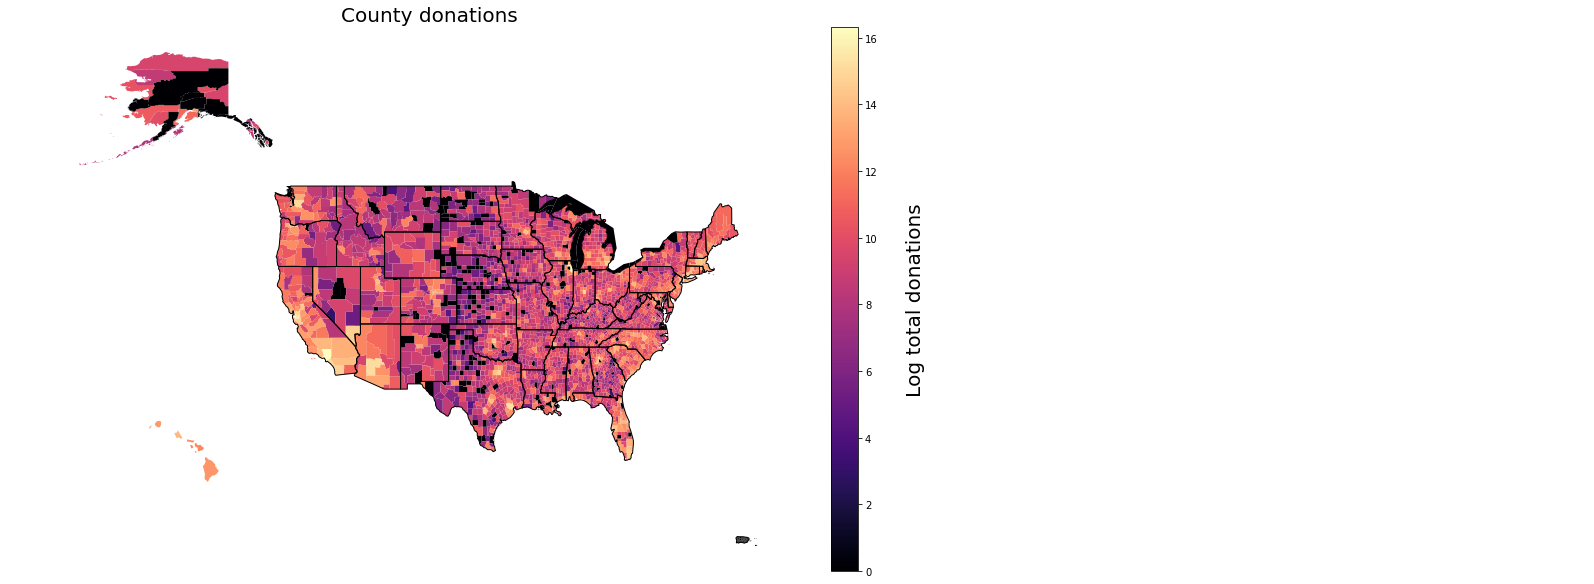

In [19]:
fig, ax = plt.subplots(1,1, figsize = (16,10))
counties.plot(column = 'log donation amount', ax = ax, vmin = 0, legend = True, cmap = 'magma')
state_borders.plot(ax = ax, facecolor = [1,1,1,0], edgecolor = 'k')
clean_subplot(ax, 'County donations', 'Log total donations', font_size = 20)
ax.set_xlim(-150, -61)

### Total donations are highest on the coasts and decline the more centrally located the county is
#### This could be due to a variety of factors:
* The average income of residents within the county
* The population size of the county
* The number of project postings from schools within that county

In [30]:
county_pers_income = pd.read_csv('personal_income_county.csv', skiprows= [0,1,3], header = [1])
counties_inc = counties.merge(county_pers_income, left_on ='id', right_on = 'GeoFips', how = 'left')
counties_inc.drop(columns = ['School State', 'County', 'GeoFips', 'GeoName'], inplace = True)
counties_inc = counties_inc.rename(columns = {'2016':'pers_income'})

In [31]:
counties_inc = counties_inc.rename(columns = {'2016':'pers_income(thousands of dollars)'})
counties_inc.head()

,id,geometry,Name_county,Name_state,num_projects,Donation Amount,log donation amount,pers_income
0,01001,POLYGON ((-86.41433781501725 32.70717406345772...,Autauga,Alabama,120.0,18736.67,9.838238,2201206
1,01003,(POLYGON ((-87.76391239396452 31.2971460747017...,Baldwin,Alabama,346.0,76334.29,11.242878,8610692
2,01005,POLYGON ((-85.05758464788408 32.06312699354592...,Barbour,Alabama,42.0,16422.69,9.706419,825374
3,01007,POLYGON ((-86.88094604710008 33.04934085539585...,Bibb,Alabama,18.0,4478.69,8.407086,662619
4,01009,POLYGON ((-86.45382005003964 34.25954773488816...,Blount,Alabama,51.0,9332.70,9.141280,1815973


In [32]:
counties_inc = counties_inc[~(counties_inc['pers_income'] == '(NA)')]

In [33]:
population = pd.read_csv('population_2017_county.csv', skiprows=[0], header=0, usecols =[1,11], dtype = str, encoding='latin-1')
counties_inc = counties_inc.merge(population, left_on = 'id', right_on = 'Id2', how = 'left')
counties_inc.rename(columns = {'Population Estimate (as of July 1) - 2016': 'population'}, inplace = True)
counties_inc[['log donation amount', 'pers_income', 'population']] = counties_inc[['log donation amount', 'pers_income', 'population']].apply(pd.to_numeric)
counties_inc['income_per_capita'] = counties_inc['pers_income']*1000/(counties_inc['population'])
counties_inc['log_income_per_capita'] = counties_inc['income_per_capita'].apply(np.log)
counties_inc[['log_pers_income', 'log_population', 'log_num_projects']] = counties_inc[['pers_income', 'population', 'num_projects']].apply(np.log)
counties_inc.head()

,id,geometry,Name_county,Name_state,num_projects,Donation Amount,log donation amount,pers_income,Id2,population,income_per_capita,log_income_per_capita,log_pers_income,log_population,log_num_projects
0,01001,POLYGON ((-86.41433781501725 32.70717406345772...,Autauga,Alabama,120.0,18736.67,9.838238,2201206.0,01001,55278.0,39820.651977,10.592141,14.604516,10.920130,4.787492
1,01003,(POLYGON ((-87.76391239396452 31.2971460747017...,Baldwin,Alabama,346.0,76334.29,11.242878,8610692.0,01003,207509.0,41495.511038,10.633341,15.968515,12.242930,5.846439
2,01005,POLYGON ((-85.05758464788408 32.06312699354592...,Barbour,Alabama,42.0,16422.69,9.706419,825374.0,01005,25774.0,32023.512066,10.374226,13.623592,10.157122,3.737670
3,01007,POLYGON ((-86.88094604710008 33.04934085539585...,Bibb,Alabama,18.0,4478.69,8.407086,662619.0,01007,22633.0,29276.675651,10.284546,13.403955,10.027164,2.890372
4,01009,POLYGON ((-86.45382005003964 34.25954773488816...,Blount,Alabama,51.0,9332.70,9.141280,1815973.0,01009,57562.0,31548.122025,10.359269,14.412132,10.960618,3.931826


In [24]:
counties_inc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 14 columns):
id                       3214 non-null object
geometry                 3214 non-null object
Name_county              3199 non-null object
Name_state               3211 non-null object
num_projects             2906 non-null float64
Donation Amount          3214 non-null float64
log donation amount      3214 non-null float64
pers_income              3093 non-null float64
Id2                      3125 non-null object
population               3125 non-null float64
income_per_capita        3093 non-null float64
log_income_per_capita    3093 non-null float64
log_pers_income          3093 non-null float64
log_population           3125 non-null float64
dtypes: float64(9), object(5)
memory usage: 376.6+ KB


C:\Users\efink\Anaconda3\envs\kaggle\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


(-150, -61)

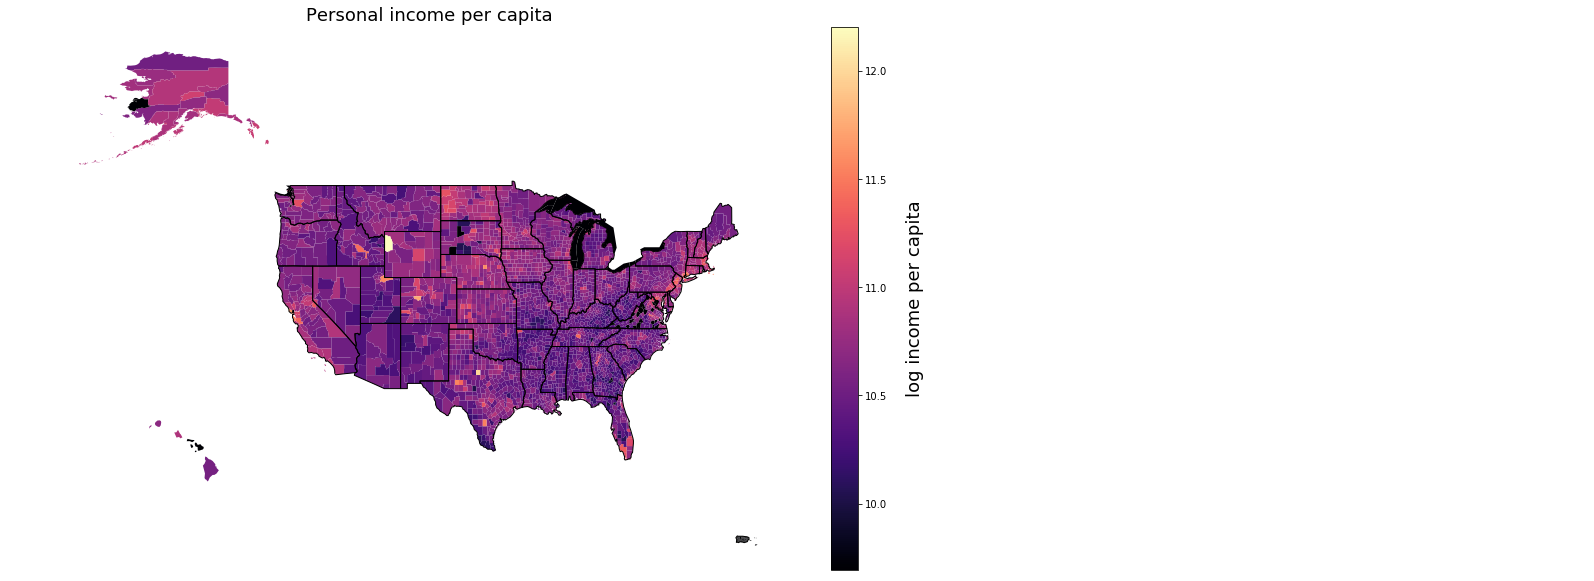

In [25]:
fig, ax = plt.subplots(1,1, figsize = (16,10))
counties_inc.plot(column = 'log_income_per_capita', ax = ax, legend = True, cmap = 'magma')
state_borders.plot(ax = ax, facecolor = [1,1,1,0], edgecolor = 'k')
clean_subplot(ax, 'Personal income per capita', 'log income per capita', font_size = 18)
ax.set_xlim(-150, -61)

C:\Users\efink\Anaconda3\envs\kaggle\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


(-150, -61)

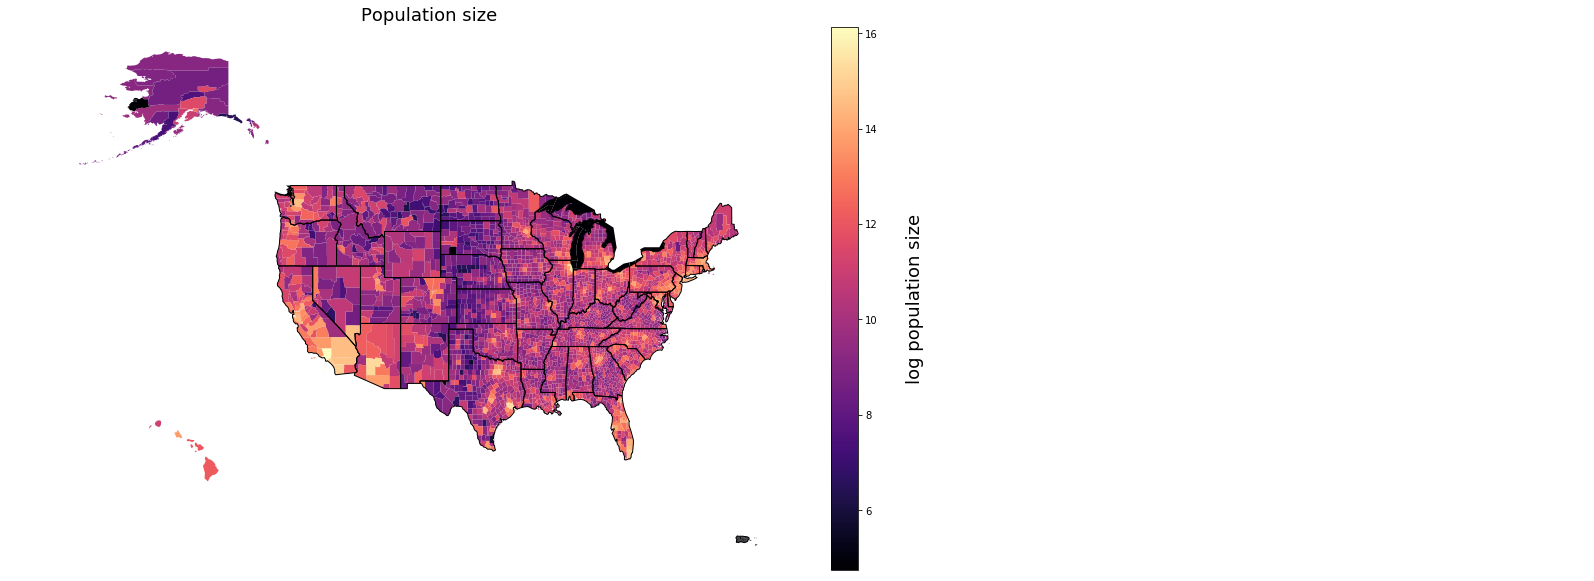

In [27]:
fig, ax = plt.subplots(1,1, figsize = (16,10))
counties_inc.plot(column = 'log_population', ax = ax, legend = True, cmap = 'magma')
state_borders.plot(ax = ax, facecolor = [1,1,1,0], edgecolor = 'k')
clean_subplot(ax, 'Population size', 'log population size', font_size = 18)
ax.set_xlim(-150, -61)

C:\Users\efink\Anaconda3\envs\kaggle\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


(-150, -61)

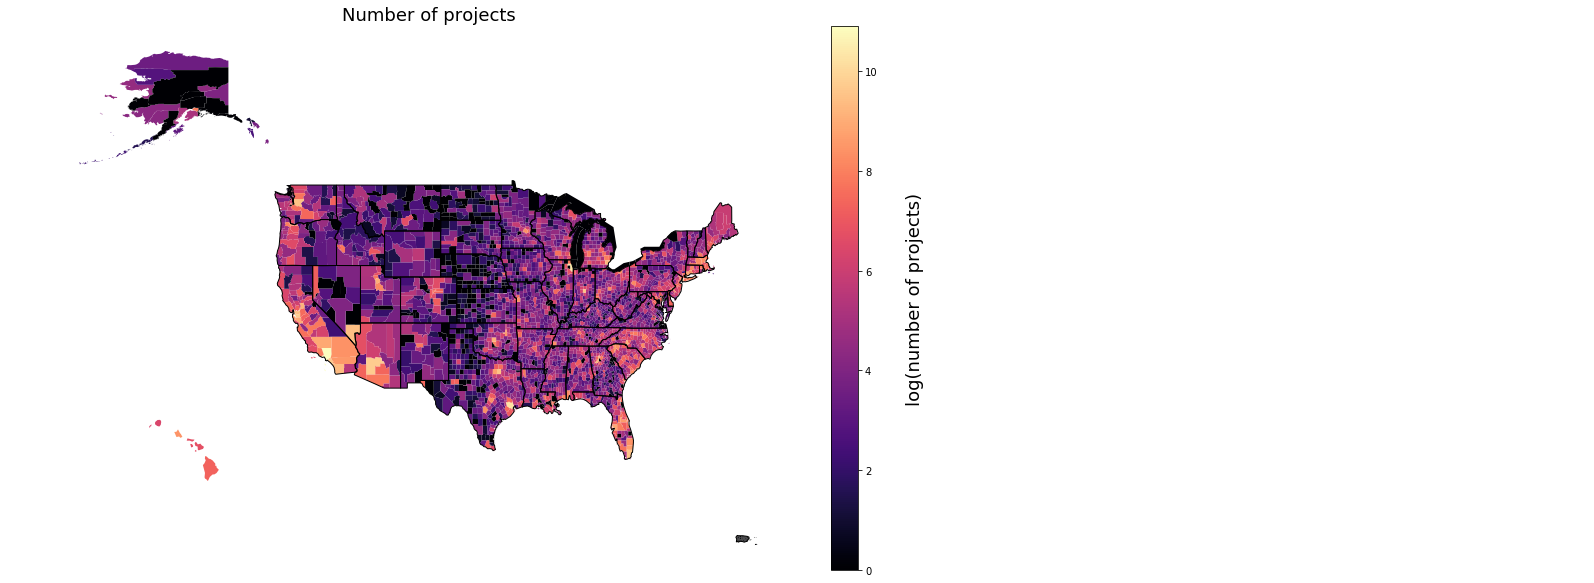

In [43]:
fig, ax = plt.subplots(1,1, figsize = (16,10))
counties_inc.plot(column = 'log_num_projects', ax = ax, legend = True, cmap = 'magma')
state_borders.plot(ax = ax, facecolor = [1,1,1,0], edgecolor = 'k')
clean_subplot(ax, 'Number of projects', 'log(number of projects)', font_size = 18)
ax.set_xlim(-150, -61)

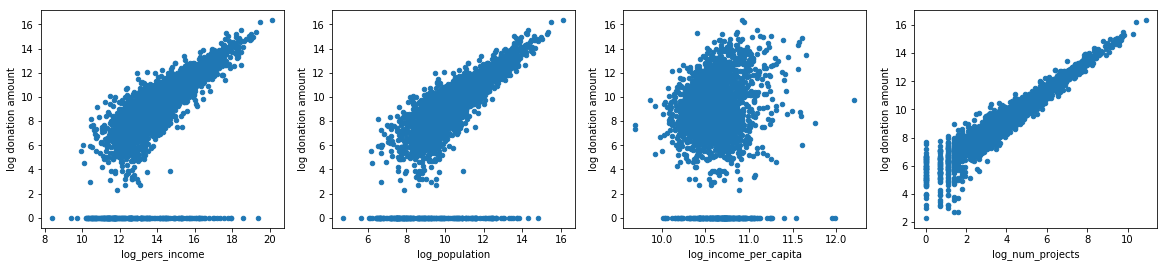

In [39]:
figure, (ax, ax1, ax2, ax3) = plt.subplots(1,4, figsize = (20, 4))
counties_df = pd.DataFrame(counties_inc)
counties_df.plot.scatter('log_pers_income', 'log donation amount', ax=ax)
counties_df.plot.scatter('log_population', 'log donation amount', ax=ax1)
counties_df.plot.scatter('log_income_per_capita', 'log donation amount', ax=ax2)
counties_df.plot.scatter('log_num_projects', 'log donation amount', ax = ax3)

In [48]:
counties_inc['donations_per_project'] = counties_inc['Donation Amount']/counties_inc['num_projects']
counties_inc['log_donations_per_project'] = counties_inc['donations_per_project'].apply(np.log)

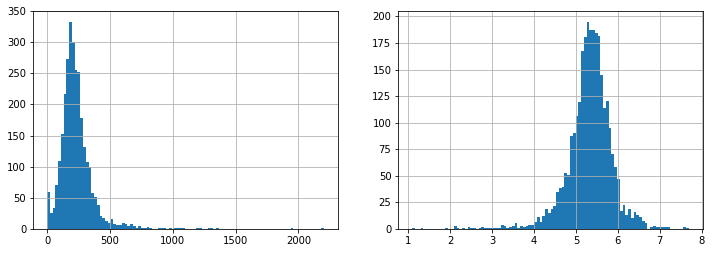

In [82]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,4))
counties_inc['donations_per_project'].hist(bins = 100, ax = ax1)
# counties_inc['log_donations_per_project'] = counties_inc['log_donations_per_project'].replace(-np.inf, np.NAN)
# counties_inc.loc[~counties_inc['log_donations_per_project'].apply(np.isfinite),'log_donations_per_project']
counties_inc['log_donations_per_project'].hist(bins = 100,ax = ax2)


In [ ]:
counties

C:\Users\efink\Anaconda3\envs\kaggle\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


(-150, -61)

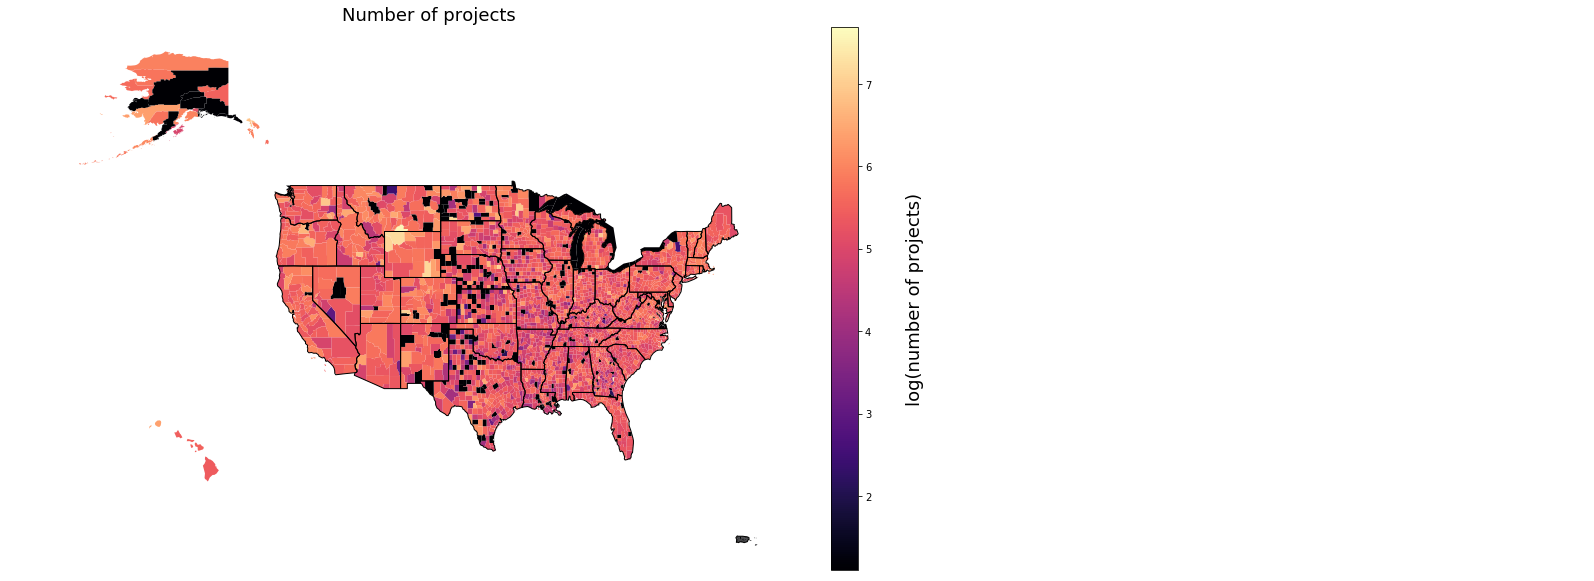

In [84]:
fig, ax = plt.subplots(1,1, figsize = (16,10))
counties_inc.plot(column = 'log_donations_per_project', ax = ax, legend = True, cmap = 'magma')
state_borders.plot(ax = ax, facecolor = [1,1,1,0], edgecolor = 'k')
clean_subplot(ax, 'Total donations per project', 'log(number of projects)', font_size = 18)
ax.set_xlim(-150, -61)